In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [00:32<00:00, 76.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [2]:
import kagglehub
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# Download the dataset
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [4]:
# Image dimensions and batch size
IMG_WIDTH, IMG_HEIGHT = 150, 150
BATCH_SIZE = 32

In [5]:
# Data paths
train_dir = os.path.join(path, 'chest_xray', 'train')
test_dir = os.path.join(path, 'chest_xray', 'test')
val_dir = os.path.join(path, 'chest_xray', 'val')


In [6]:
# Function to visualize images
def plot_images(img_paths, labels):
    plt.figure(figsize=(10, 10))
    for i in range(len(img_paths)):
        img = Image.open(img_paths[i])
        plt.subplot(1, len(img_paths), i + 1)
        plt.imshow(img)
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

In [7]:
# Function to visualize images
def plot_images(img_paths, labels):
    plt.figure(figsize=(10, 10))
    for i in range(len(img_paths)):
        img = Image.open(img_paths[i])
        plt.subplot(1, len(img_paths), i + 1)
        plt.imshow(img)
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

In [8]:
# Data augmentation and generators
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [9]:
# CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [11]:
# Train the model and store history
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.7906 - loss: 0.4853 - val_accuracy: 0.6875 - val_loss: 0.7900
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.8977 - loss: 0.2370 - val_accuracy: 0.7500 - val_loss: 0.6595
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.9279 - loss: 0.1965 - val_accuracy: 0.8750 - val_loss: 0.4603
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.9379 - loss: 0.1688 - val_accuracy: 0.6250 - val_loss: 1.1300
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.9303 - loss: 0.1668 - val_accuracy: 0.8125 - val_loss: 0.4222
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - accuracy: 0.9431 - loss: 0.1499 - val_accuracy: 0.6875 - val_loss: 0.6475
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - accuracy: 0.9564 - loss: 0.1218 - val_accuracy: 0.8125 - val_loss: 0.4657
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.9503 - loss: 0.1200 - val_accuracy: 0.687

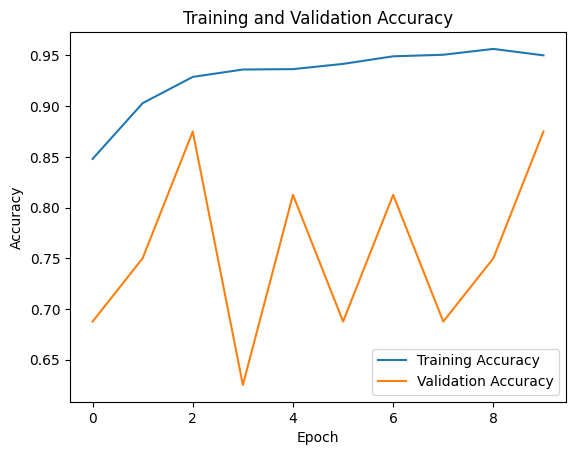

In [12]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
# Evaluate on test data and print accuracy
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print('\nTest accuracy:',test_acc)

1/1 - 1s - 558ms/step - accuracy: 0.8750 - loss: 0.3975

Test accuracy: 0.875
